In [17]:
# Import the dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


In [18]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [19]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [20]:
from citipy import citipy

In [21]:
# create a list for holding the cities
cities = []
#identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

622

In [22]:
# imort the requests library
import requests

# import the API key
from config import weather_api_key

In [23]:
# Starting URL for Weather Map API Call

url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [24]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging
print('Beginning Data Retrieval      ')
print('------------------------------')

# create counters
record_count = 1
set_count = 1

# loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in set of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    #create endpoint URL with each city
    city_url = url + '&q=' + city.replace(" ", "+")
    
    # log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # Add 1 to the record count
    record_count +=1
    
# Run an API request for each of the cities
    try:
          #Parse the JSON and retrieve data
          city_weather = requests.get(city_url).json()
          #Parse out the needed data
          city_lat = city_weather['coord']['lat']
          city_lng = city_weather['coord']['lon']
          city_max_temp = city_weather['main']['temp_max']
          city_humidity = city_weather['main']['humidity']
          city_clouds = city_weather['clouds']['all']
          city_wind = city_weather['clouds']['all']
          city_country = city_weather['sys']['country']
          # Convert the date to ISO standard
          city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
          # Append the city information into city_data list
          city_data.append({'City': city.title(),
                           'Lat': city_lat,
                           'Lng': city_lng,
                           'Max Temp': city_max_temp,
                           'Humidity': city_humidity,
                           'Cloudiness': city_clouds,
                           'Wind Speed': city_wind,
                           'Country': city_country,
                           'Date': city_date})
# If an error is experienced, skip the city.
    except:
          print('City not found. Skipping...')
          pass

# Indicate that Data Loading is complete
print('------------------------------')
print('Data Retrieval Complete       ')
print('------------------------------')
          

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | sant feliu de guixols
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | ixtapa
Processing Record 5 of Set 1 | saleaula
City not found. Skipping...
Processing Record 6 of Set 1 | teya
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | yendi
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | cockburn harbour
City not found. Skipping...
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | warqla
City not found. Skipping...
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | tsuruga
Processing Record 20 of 

Processing Record 32 of Set 4 | puerto ayora
Processing Record 33 of Set 4 | leo
Processing Record 34 of Set 4 | khatanga
Processing Record 35 of Set 4 | sao filipe
Processing Record 36 of Set 4 | shenjiamen
Processing Record 37 of Set 4 | quthing
Processing Record 38 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 39 of Set 4 | bonthe
Processing Record 40 of Set 4 | kautokeino
Processing Record 41 of Set 4 | flin flon
Processing Record 42 of Set 4 | saldanha
Processing Record 43 of Set 4 | balikpapan
Processing Record 44 of Set 4 | nikolsk
Processing Record 45 of Set 4 | gladstone
Processing Record 46 of Set 4 | caconda
Processing Record 47 of Set 4 | masindi
Processing Record 48 of Set 4 | codrington
Processing Record 49 of Set 4 | gizo
Processing Record 50 of Set 4 | pyay
Processing Record 1 of Set 5 | paamiut
Processing Record 2 of Set 5 | novo aripuana
Processing Record 3 of Set 5 | yenagoa
Processing Record 4 of Set 5 | miranorte
City not found. Skipping...
Proc

Processing Record 24 of Set 8 | sitka
Processing Record 25 of Set 8 | cap malheureux
Processing Record 26 of Set 8 | clermont
Processing Record 27 of Set 8 | acapulco
Processing Record 28 of Set 8 | yauya
Processing Record 29 of Set 8 | broken hill
Processing Record 30 of Set 8 | souillac
Processing Record 31 of Set 8 | kulhudhuffushi
Processing Record 32 of Set 8 | new norfolk
Processing Record 33 of Set 8 | port-cartier
Processing Record 34 of Set 8 | kruisfontein
Processing Record 35 of Set 8 | aleksandrov gay
Processing Record 36 of Set 8 | poli
Processing Record 37 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 38 of Set 8 | sisimiut
Processing Record 39 of Set 8 | athabasca
Processing Record 40 of Set 8 | am timan
Processing Record 41 of Set 8 | kaka
Processing Record 42 of Set 8 | rabat
Processing Record 43 of Set 8 | misratah
Processing Record 44 of Set 8 | luderitz
Processing Record 45 of Set 8 | tilichiki
Processing Record 46 of Set 8 | yuzhno-yeniseyski

City not found. Skipping...
Processing Record 10 of Set 12 | ngama
Processing Record 11 of Set 12 | pultusk
Processing Record 12 of Set 12 | san quintin
Processing Record 13 of Set 12 | puerto narino
Processing Record 14 of Set 12 | kismayo
Processing Record 15 of Set 12 | abnub
Processing Record 16 of Set 12 | chegdomyn
Processing Record 17 of Set 12 | ketchikan
Processing Record 18 of Set 12 | itambacuri
Processing Record 19 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 20 of Set 12 | palu
Processing Record 21 of Set 12 | gualeguaychu
Processing Record 22 of Set 12 | zhanaozen
Processing Record 23 of Set 12 | sandwick
Processing Record 24 of Set 12 | senekal
Processing Record 25 of Set 12 | mehamn
Processing Record 26 of Set 12 | vardo
Processing Record 27 of Set 12 | mangrol
Processing Record 28 of Set 12 | tarudant
City not found. Skipping...
Processing Record 29 of Set 12 | pavlovsk
Processing Record 30 of Set 12 | goderich
Processing Record 31 of Set 12 | pr

In [26]:
len(city_data)

564

In [27]:
# Convert the array of dictionaries to a Pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sant Feliu De Guixols,41.7833,3.0333,75.92,49,0,0,ES,2022-07-13 23:01:45
1,Cape Town,-33.9258,18.4232,57.88,93,100,100,ZA,2022-07-13 23:01:25
2,Bethel,41.3712,-73.4140,85.86,57,53,53,US,2022-07-13 22:59:12
3,Ixtapa,20.7000,-105.2000,85.23,78,96,96,MX,2022-07-13 23:00:15
4,Teya,60.3778,92.6267,50.13,76,97,97,RU,2022-07-13 23:01:46
5,Hithadhoo,-0.6000,73.0833,83.03,73,92,92,MV,2022-07-13 23:01:47
6,Lompoc,34.6391,-120.4579,88.02,71,3,3,US,2022-07-13 23:01:12
7,Yendi,9.4427,-0.0099,74.07,90,90,90,GH,2022-07-13 23:01:48
8,Ushuaia,-54.8000,-68.3000,25.29,93,18,18,AR,2022-07-13 23:01:04
9,Pevek,69.7008,170.3133,36.82,86,99,99,RU,2022-07-13 23:01:48


In [28]:
#reorder the DF

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sant Feliu De Guixols,ES,2022-07-13 23:01:45,41.7833,3.0333,75.92,49,0,0
1,Cape Town,ZA,2022-07-13 23:01:25,-33.9258,18.4232,57.88,93,100,100
2,Bethel,US,2022-07-13 22:59:12,41.3712,-73.4140,85.86,57,53,53
3,Ixtapa,MX,2022-07-13 23:00:15,20.7000,-105.2000,85.23,78,96,96
4,Teya,RU,2022-07-13 23:01:46,60.3778,92.6267,50.13,76,97,97
5,Hithadhoo,MV,2022-07-13 23:01:47,-0.6000,73.0833,83.03,73,92,92
6,Lompoc,US,2022-07-13 23:01:12,34.6391,-120.4579,88.02,71,3,3
7,Yendi,GH,2022-07-13 23:01:48,9.4427,-0.0099,74.07,90,90,90
8,Ushuaia,AR,2022-07-13 23:01:04,-54.8000,-68.3000,25.29,93,18,18
9,Pevek,RU,2022-07-13 23:01:48,69.7008,170.3133,36.82,86,99,99


In [29]:
# create the output file (csv)
output_data_file = 'weather_data/cities.csv'

#Export the CIty_data into the CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

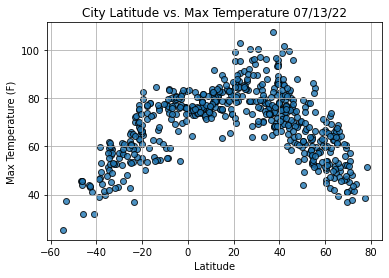

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

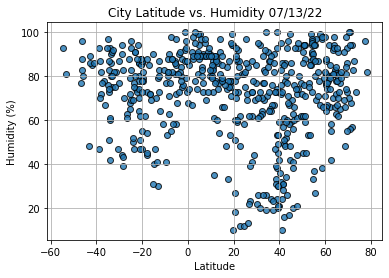

In [32]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(lats,
           humidity,
           edgecolors='black', linewidths=1, marker='o',
           alpha=.8, label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

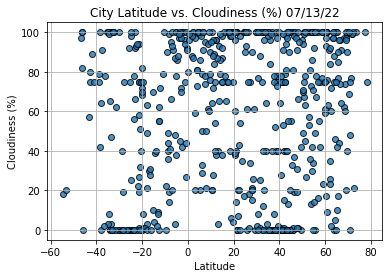

In [33]:
# build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolors='black', linewidths=1, marker='o',
           alpha=.8, label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig3.png')

# Show plot
plt.show()

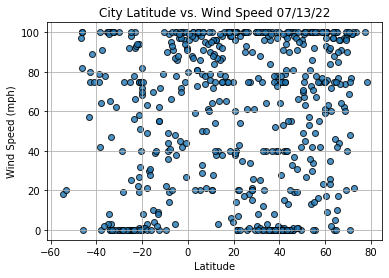

In [34]:
# build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolors='black', linewidths=1, marker='o',
            alpha=.8, label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig4.png')

#Show plot
plt.show()

In [66]:
# import lineregress
from scipy.stats import linregress

#create a function to create perform linear regression of the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # run regression on hemispher weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    #calculate the regression line 'y values' from the slope and intercept
    regress_values = x_values * slope + intercept

    # Get the equation of the line
    line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept,2))

    # Create a scatter plot of the x and y values
    plt.scatter(x_values,y_values)
    #plot the regression line with the x-values and the y coordinates based on teh intercept and slope
    plt.plot(x_values, regress_values, 'r')
    # Annotatate the text for the line equation and add its coordinates 
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
# create Northern and Southern Hemisphere DF
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

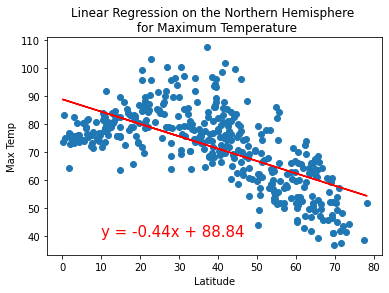

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

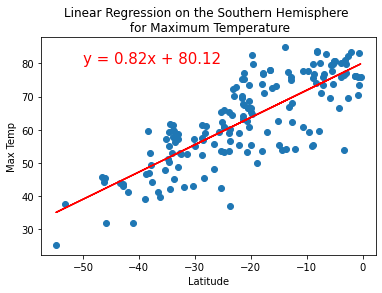

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50, 80))

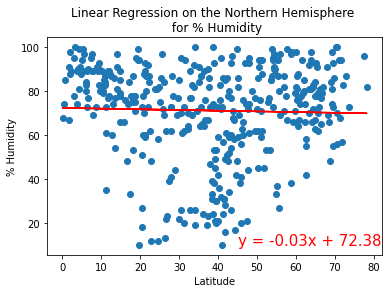

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45, 10))

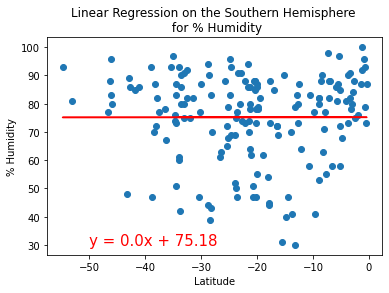

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,30))

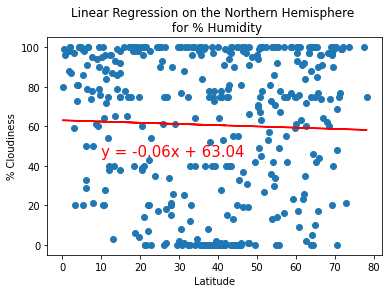

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Cloudiness',(10, 45))

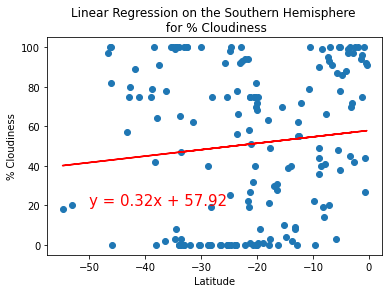

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,20))

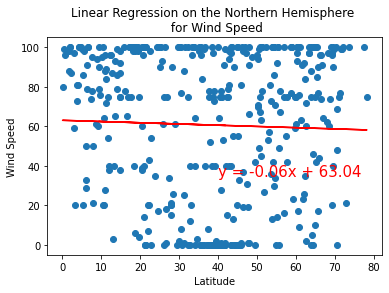

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

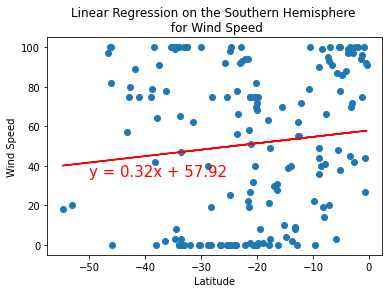

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))